# PPIDM (84 552 DDIs) - NEW CLASSIFICATION ANALYSIS  
<br>  
<br>  

In [16]:
import pickle

# import useful libraries
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import matplotlib

# ignore the warnings in this notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import ppidm dataframe, output of the p_value python file code
ppidm = pd.read_csv("resultdata/result-all", sep="\t")  # shape = (84552, 21)
ppidm

,D1,D2,SCORE,INTACT_SCORE,INTACT_PV,DIP_SCORE,DIP_PV,MINT_SCORE,MINT_PV,HPRD_SCORE,...,BIOGRID_SCORE,BIOGRID_PV,STRING_EXP_SCORE,STRING_EXP_PV,STRING_REST_SCORE,STRING_REST_PV,SIFTS_SCORE,SIFTS_PV,CLASS,INTERPRO
0,PF02769,PF13507,0.088072,0.011773,0.0,0.049507,7.406808766310296e-44,0.095130,3.849925148356953e-43,0.000000,...,0.008260,0.0,0.006164,0.0,0.006185,0.0,0.129099,1.212356e-06,Bronze,Yes
1,PF02769,PF02843,0.115289,0.004793,1.4742268313510745e-247,0.000000,NaN,0.045835,1.4124323582002133e-46,0.353553,...,0.009855,0.0,0.003335,0.0,0.003227,0.0,0.111803,2.060408e-03,Bronze,No
2,PF02769,PF02844,0.115289,0.004793,1.4742268313510745e-247,0.000000,NaN,0.045835,1.4124323582002133e-46,0.353553,...,0.009855,0.0,0.003335,0.0,0.003227,0.0,0.111803,2.060408e-03,Bronze,No
3,PF02769,PF02769,0.560638,0.014245,0.0,0.058824,1.4742056338156193e-134,0.117647,6.171672425554692e-135,0.250000,...,0.011461,0.0,0.003066,0.0,0.003116,0.0,0.800000,1.453297e-63,Gold,Yes
4,PF02769,PF18072,0.087038,0.004893,0.0,0.000000,NaN,0.064820,6.810781898441019e-25,0.000000,...,0.008260,0.0,0.003813,0.0,0.003901,0.0,0.129099,2.028924e-11,Gold,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45015,PF16011,PF16011,0.662252,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,3.389711e-07,Silver,Yes
45016,PF16560,PF16560,0.662252,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,NaN,Silver,Yes
45017,PF09633,PF09633,0.662252,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,3.389711e-07,Silver,Yes
45018,PF16753,PF16753,0.662252,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,NaN,Silver,Yes


<br>  
## Add Goldstandard column to classified PPIDM:

In this section we add to ppidm a column `IN_GOLDSTANDARD` in which we specify whether the DDI is in the goldstandard or not.   
We get **6989** DDIs that are in both PPIDM and the GoldStandard.

In [3]:
# import goldstandard
GS = pd.read_csv("resultdata/pfam-pfam-interaction-goldstandard", sep='\t', header=None)
GS.columns = ['D1', 'D2', 'INTACT', 'DIP', 'MINT', 'BIOGRID', 'STRING_EXP', 'STRING_REST', 'SIFTS', 'HPRD', 'SCORE', 'FLAG']
GS['Interactions'] = list(zip(GS['D1'], GS['D2']))
GS_ddis = list( GS['Interactions'] )
ppidm['IN_GOLDSTANDARD'] = ppidm.apply(lambda row: 'yes' if (row['D1'], row['D2']) in GS_ddis else 'no', axis=1)
ppidm
# add the yes/no in GoldStandard column to ppidm
# ppidm['DDI'] = ppidm[['D1','D2']].apply(frozenset, axis=1)
# ppidm['IN_GOLDSTANDARD'] = ppidm.iloc[:,21].apply(lambda x: 'yes' if x in GS_ddis else 'no')  # ~50 seconds
# ppidm.drop(labels='DDI', axis=1, inplace=True)


,D1,D2,SCORE,INTACT_SCORE,INTACT_PV,DIP_SCORE,DIP_PV,MINT_SCORE,MINT_PV,HPRD_SCORE,...,BIOGRID_PV,STRING_EXP_SCORE,STRING_EXP_PV,STRING_REST_SCORE,STRING_REST_PV,SIFTS_SCORE,SIFTS_PV,CLASS,INTERPRO,IN_GOLDSTANDARD
0,PF02769,PF13507,0.088072,0.011773,0.0,0.049507,7.406808766310296e-44,0.095130,3.849925148356953e-43,0.000000,...,0.0,0.006164,0.0,0.006185,0.0,0.129099,1.212356e-06,Bronze,Yes,yes
1,PF02769,PF02843,0.115289,0.004793,1.4742268313510745e-247,0.000000,NaN,0.045835,1.4124323582002133e-46,0.353553,...,0.0,0.003335,0.0,0.003227,0.0,0.111803,2.060408e-03,Bronze,No,no
2,PF02769,PF02844,0.115289,0.004793,1.4742268313510745e-247,0.000000,NaN,0.045835,1.4124323582002133e-46,0.353553,...,0.0,0.003335,0.0,0.003227,0.0,0.111803,2.060408e-03,Bronze,No,no
3,PF02769,PF02769,0.560638,0.014245,0.0,0.058824,1.4742056338156193e-134,0.117647,6.171672425554692e-135,0.250000,...,0.0,0.003066,0.0,0.003116,0.0,0.800000,1.453297e-63,Gold,Yes,yes
4,PF02769,PF18072,0.087038,0.004893,0.0,0.000000,NaN,0.064820,6.810781898441019e-25,0.000000,...,0.0,0.003813,0.0,0.003901,0.0,0.129099,2.028924e-11,Gold,No,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45015,PF16011,PF16011,0.662252,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,NaN,1.000000,3.389711e-07,Silver,Yes,yes
45016,PF16560,PF16560,0.662252,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,NaN,1.000000,NaN,Silver,Yes,yes
45017,PF09633,PF09633,0.662252,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,NaN,1.000000,3.389711e-07,Silver,Yes,yes
45018,PF16753,PF16753,0.662252,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,NaN,1.000000,NaN,Silver,Yes,yes


In [4]:
# counting of unique values of the 'IN_GOLDSTANDARD' column
ppidm.IN_GOLDSTANDARD.value_counts()

no     36841
yes     8179
Name: IN_GOLDSTANDARD, dtype: int64

In [21]:
silver = ppidm[ppidm.CLASS =='Bronze']
# with open('resultdata/interactions_bronze', 'w') as f:
#     for index, row in silver.iterrows():
#         f.write(f"{row['D1']}\t{row['D2']}\n")

<br>  
## Scores & P-values : Numerical values cleaning:

The numerical values in ppidm dataframe will be modified as the following:
    - The scores will be rounded to 8 decimals;
    - The p_values equal to '1*' will become equal to '1', and the floats will be rounded to 3 decimals. Note that the '1*' has been assigned to 7 950 p_values. A '1*' means that the real p_value is actually greater than 1.

In [27]:
# define a list of indexes of p_values and scores columns
p_value_columns=[i*2 for i in range(2,10)]
scores_columns = [2]+[(i*2)+1 for i in range(1,9)]

# define a variable 'count' which computes the number of p_values equal to 1*
count=0

# define functions of rounding to apply to scores and p_values
def round_p_value(x):
    global count
    if x=='1*': 
        count+=1
        return '1'
    if not isnan(float(x)):
        if float(x)==0: return 0
        return "{0:.3e}".format(float(x))
    else: return x
    
def round_scores(x):
    if float(x)==0 : return 0
    return f"{float(x):.8f}"

# rounding of p_values
for i in p_value_columns: ppidm.iloc[:,i] =pd.DataFrame(ppidm.iloc[:,i]).applymap(round_p_value)
    
# rounding of scores
for i in scores_columns:  ppidm.iloc[:,i] =pd.DataFrame(ppidm.iloc[:,i]).applymap(round_scores)

In [28]:
print(" The number of '1*' p_values is: ", count,".")

 The number of '1*' p_values is:  0 .


In [29]:
# display the updated PPIDM dataframe
ppidm

,D1,D2,SCORE,INTACT_SCORE,INTACT_PV,DIP_SCORE,DIP_PV,MINT_SCORE,MINT_PV,HPRD_SCORE,...,BIOGRID_PV,STRING_EXP_SCORE,STRING_EXP_PV,STRING_REST_SCORE,STRING_REST_PV,SIFTS_SCORE,SIFTS_PV,CLASS,INTERPRO,IN_GOLDSTANDARD
0,PF15951,PF15951,0.68287571,0.03278689,9.450e-277,0,NaN,0,NaN,0.14285714,...,0,0.00080354,0,0.00084034,0,1.00000000,3.390e-07,Gold,No,no
1,PF11851,PF15951,0.69599693,0.03105350,1.409e-266,0,NaN,0,NaN,0.24565184,...,2.807e-316,0.00185080,0,0.00194132,0,1.00000000,3.390e-07,Gold,No,no
2,PF11851,PF11851,0.69988929,0.02941176,3.509e-303,0,NaN,0,NaN,0.27586207,...,0,0.00155017,0,0.00163084,0,1.00000000,3.390e-07,Gold,No,no
3,PF00010,PF00010,0.26478172,0.09108967,0,0.23404255,0,0.11904762,0,0.21102362,...,0,0.03926018,0,0.03991953,0,0.34328358,1.213e-202,Gold,Yes,yes
4,PF00010,PF00439,0.04440215,0.01239639,1.449e-02,0.02636136,9.621e-04,0.01433165,5.712e-02,0.05565099,...,1.110e-22,0.00683649,1.892e-23,0.00707584,1.646e-27,0.05331912,5.899e-05,Gold,No,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45015,PF16011,PF16011,0.66225166,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,1.00000000,3.390e-07,Silver,Yes,yes
45016,PF16560,PF16560,0.66225166,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,1.00000000,NaN,Bronze,Yes,yes
45017,PF09633,PF09633,0.66225166,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,1.00000000,3.390e-07,Silver,Yes,yes
45018,PF16753,PF16753,0.66225166,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,1.00000000,NaN,Bronze,Yes,yes


In [8]:
# save the results:
#ppidm.to_csv('p_value_classified_ppidm_gs_column.csv', index = False)
#ppidm.to_pickle("p_value_classified_ppidm_gs_column")

<br>  
## Classes subsets & PPIDM sorting:

When counting the number of DDIs in each class we find:  
- Gold: 9175 DDIs.
- Silver: 24934 DDIs.
- Bronze: 50443 DDIs.  
$\Rightarrow$ Sum = 84552 DDIs.  

In [10]:
# sort ppidm by the scores column, in a descending order
score_sort = ppidm.sort_values([ 'SCORE'], axis=0, ascending=False)

# split the sorted ppidm dataframes unto subset for each class 
gold = score_sort[ score_sort.CLASS =='Gold']       # shape = (6273, 22)
silver = score_sort[ score_sort.CLASS =='Silver']   # shape = (11549, 22)
bronze = score_sort[ score_sort.CLASS =='Bronze']   # shape = (66730, 22)

# create a sorted PPIDM by the classes then by the scores in a descending order
sorted_ppidm = pd.concat([gold, silver, bronze], axis=0)
sorted_ppidm.SCORE = sorted_ppidm.SCORE.apply(float)

Text(0.5, 1.0, 'Boxplot: PPIDM Classes Scores')

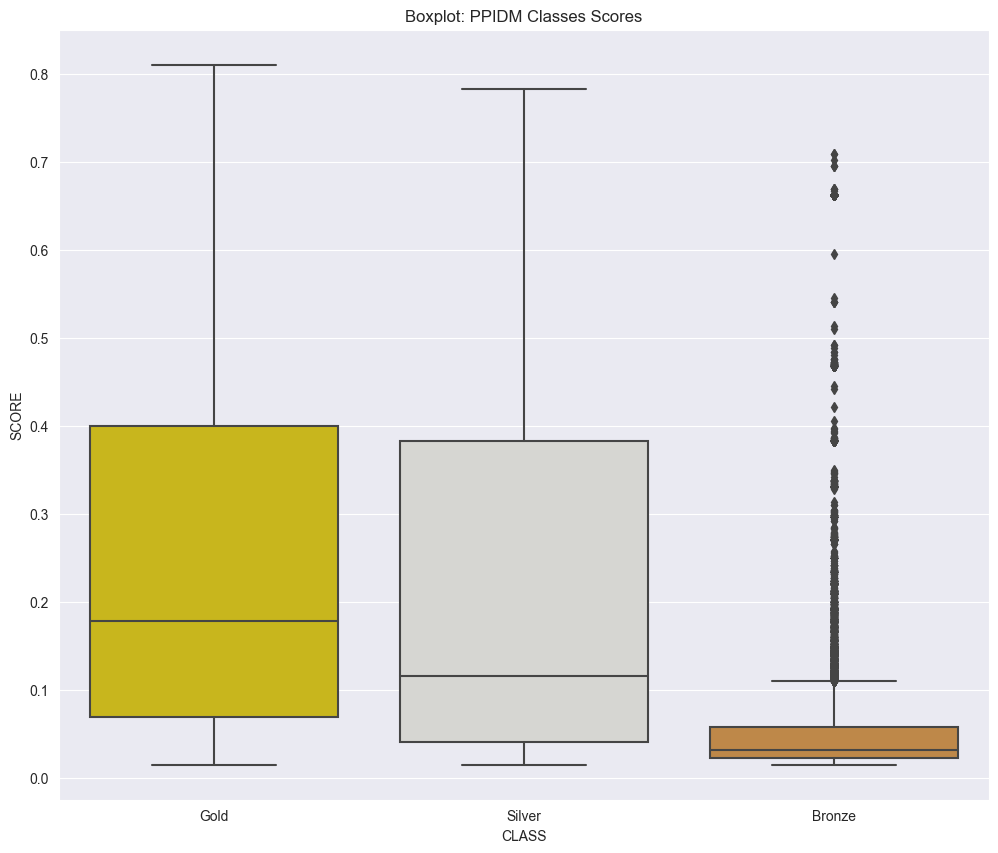

In [31]:

plt.figure(figsize=(12,10))
colors = ['#E5CC00','#D7D7D1','#D18A36']
plot3 = sns.boxplot(x="CLASS", y="SCORE", data=sorted_ppidm, palette=sns.color_palette(colors))
plot3.set_title('Boxplot: PPIDM Classes Scores')

In [34]:
pd.DataFrame(group.describe().rename(columns={'SCORE':name}).squeeze() for name, group in sorted_ppidm.groupby('CLASS')).loc[['Gold', 'Silver', 'Bronze']]

,count,mean,std,min,25%,50%,75%,max
Gold,9100.0,0.256702,0.222555,0.015010,0.069695,0.178880,0.400225,0.810430
Silver,13710.0,0.235713,0.240873,0.015003,0.041288,0.115752,0.382875,0.783349
Bronze,22210.0,0.061102,0.093572,0.015002,0.023044,0.032005,0.057694,0.708609


In [12]:
# saving the resulting dataframes under three formats: python variable(to_pickle), csv and excel files.

#sorted_ppidm.to_pickle("sorted ppidm and classes subests/ppidm_classified_sorted")
#sorted_ppidm.to_csv("sorted ppidm and classes subests/ppidm_classified_sorted.csv", index=False,na_rep="NA")
#sorted_ppidm.to_excel("sorted ppidm and classes subests/ppidm_classified_sorted.xlsx", index=False,na_rep="NA")

#gold.to_pickle("sorted ppidm and classes subests/ppidm_gold_classified_sorted")
#gold.to_csv("sorted ppidm and classes subests/ppidm_gold_classified_sorted.csv", index=False,na_rep="NA")
#gold.to_excel("sorted ppidm and classes subests/ppidm_gold_classified_sorted.xlsx", index=False,na_rep="NA")

#silver.to_pickle("sorted ppidm and classes subests/ppidm_silver_classified_sorted")
#silver.to_csv("sorted ppidm and classes subests/ppidm_silver_classified_sorted.csv", index=False,na_rep="NA")
#silver.to_excel("sorted ppidm and classes subests/ppidm_silver_classified_sorted.xlsx", index=False,na_rep="NA")

#bronze.to_pickle("sorted ppidm and classes subests/ppidm_bronze_classified_sorted")
#bronze.to_csv("sorted ppidm and classes subests/ppidm_bronze_classified_sorted.csv", index=False,na_rep="NA")
#bronze.to_excel("sorted ppidm and classes subests/ppidm_bronze_classified_sorted.xlsx", index=False,na_rep="NA")

<br>  
## Homo-DDIs in PPIDM - Classification counts:

Homo-DDIs are interactions between the same domain. Here we split these DDIs according to their class. The results are:  
- Total number of Homo-DDIs: 7203.
- Gold: 3000 DDIs.
- Silver: 4160 DDIs.
- Bronze: 43 DDIs.


In [13]:
# select the Homo-DDIs from ppidm
ppidm_homo = sorted_ppidm[sorted_ppidm['D1']==sorted_ppidm['D2']]

# split into three subsets according to the class
ppidm_homo_gold = ppidm_homo[ppidm_homo['CLASS']=='Gold']
ppidm_homo_silver = ppidm_homo[ppidm_homo['CLASS']=='Silver']
ppidm_homo_bronze = ppidm_homo[ppidm_homo['CLASS']=='Bronze']

In [14]:
print('Gold:', ppidm_homo_gold.shape[0], 'DDIs.')
print('Silver:', ppidm_homo_silver.shape[0], 'DDIs.')
print('Bronze:',ppidm_homo_bronze.shape[0], 'DDIs.')
print('Sum =',ppidm_homo_gold.shape[0] + ppidm_homo_silver.shape[0] + ppidm_homo_bronze.shape[0], 'DDIs.')

Gold: 3000 DDIs.
Silver: 4160 DDIs.
Bronze: 43 DDIs.
Sum = 7203 DDIs.


Text(0.5, 1.0, 'Boxplot: PPIDM homo-DDIs Classes Scores')

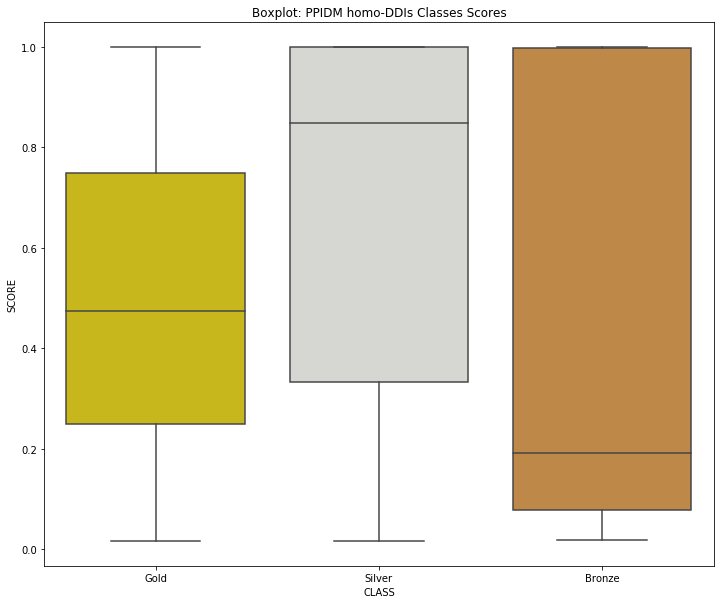

In [15]:
ppidm_homo.SCORE = ppidm_homo.SCORE.apply(float)
plt.figure(figsize=(12,10))
colors = ['#E5CC00','#D7D7D1','#D18A36']
plot3 = sns.boxplot(x="CLASS", y="SCORE", data=ppidm_homo, palette=sns.color_palette(colors))
plot3.set_title('Boxplot: PPIDM homo-DDIs Classes Scores')

In [33]:
pd.DataFrame(group.describe().rename(columns={'SCORE':name}).squeeze() for name, group in ppidm_homo.groupby('CLASS')).loc[['Gold', 'Silver', 'Bronze']]

NameError: name 'ppidm_homo' is not defined

## PPIDM Pfam Entries:

Here we calculate the total number of pfam entries in PPIDM database. We find **12 098** entries.

In [35]:
len(set(ppidm.D1)|set(ppidm.D2))

8696

<br>  

## PPIDM in New 3DID-2020 Analysis:

$Definition:$  
The new portion of 3did_2020 is the version of 3did database released in 2020 (probably in April) from which omit the DDIs of 3did 2017 (february) release. This latter database is a main constituent of the goldstandard.
The code below generates the intersection database between PPIDM and this new portion of 3did_2020. It contains:
- Total number of DDIs: **800** out of 3854, which means that PPIDM infers 20.758 % of the new DDIs from 3did_2020 ,
- Gold: 258 DDIs.
- Silver: 419 DDIs.
- Bronze: 123 DDIs.

In [18]:
# prepare a simple version of ppidm dataframe, containing a DDI, Domain1, Domain2, score and class columns:
ppidm = pd.read_pickle("sorted ppidm and classes subests/ppidm_classified_sorted")
ddi_set = pd.DataFrame(ppidm[['D1','D2']].apply(frozenset, axis=1))
simple_ppidm = pd.concat([ddi_set, ppidm[['D1', 'D2', 'SCORE', 'CLASS']]], axis=1)
simple_ppidm.columns = ['DDI', 'D1', 'D2', 'SCORE', 'CLASS']

In [19]:
# import 3did, february 2017 and 2020 versions
df_3did_2017_1 = pd.read_pickle("Input Dataframes/dataframe_3did_flat_v1_2017")  # shape = (10593, 4)
df_3did_2020 = pd.read_pickle("Input Dataframes/dataframe_3did_2020")    # shape = (13499, 4)
df_3did_2020 = df_3did_2020[['DDI ppidm', 'DDI', 'Number of PDB entries', 'Liste of Structures']]
df_3did_2020.columns = ['DDI', 'DDI full name', 'Number of PDB structures', 'List of structures']
df_3did_2020.index = [i for i in range(len(df_3did_2020))]

# extracting new released DDI: 3did_2020 \ 3did_2017
origin = df_3did_2017_1[["DDI"]].applymap(frozenset)
df_3did_2020[["DDI"]] = df_3did_2020[["DDI"]].applymap(frozenset)
new_3did_2020 = df_3did_2020.merge(origin,  how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only'].drop(columns=['_merge'])

# create the intersection dataframe between ppidm and the dataframe of new DDIs in 3did_2020
intersection = new_3did_2020.merge(simple_ppidm, on="DDI", how="inner")
nr_3did = new_3did_2020.shape[0]
nr_inter = intersection.shape[0]
print("Number of new DDIs in 3did_2020:", nr_3did, '.')
print("Number of DDIs in the intersection btw PPIDM and the new portion of 3did_2020:", nr_inter,"(",round(100*nr_inter/nr_3did,3),"%) .")


Number of new DDIs in 3did_2020: 3854 .
Number of DDIs in the intersection btw PPIDM and the new portion of 3did_2020: 800 ( 20.758 %) .


In [20]:
# create classes subsets from the intersection of PPIDM and new DDIs in 3did_2020
intersection_gold = intersection[intersection['CLASS']=='Gold']
intersection_silver = intersection[intersection['CLASS']=='Silver']
intersection_bronze = intersection[intersection['CLASS']=='Bronze']

# print the number of DDIs per Class subset
print('Gold:', intersection_gold.shape[0], 'DDIs.')
print('Silver:', intersection_silver.shape[0], 'DDIs.')
print('Bronze:',intersection_bronze.shape[0], 'DDIs.')
print('Sum =',intersection_gold.shape[0] + intersection_silver.shape[0] + intersection_bronze.shape[0], 'DDIs.')

Gold: 258 DDIs.
Silver: 419 DDIs.
Bronze: 123 DDIs.
Sum = 800 DDIs.


Text(0.5, 1.0, 'Boxplot - PPIDM intersection with 3did2020-delta - Classes Scores')

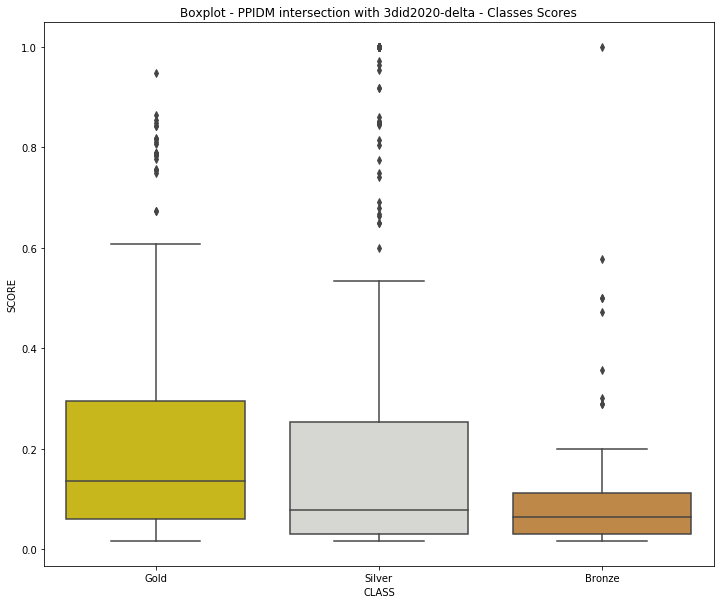

In [21]:
intersection2 = pd.concat([intersection_gold, intersection_silver, intersection_bronze])
intersection2.SCORE = intersection2.SCORE.apply(float)
plt.figure(figsize=(12,10))
colors = ['#E5CC00','#D7D7D1','#D18A36']
plot3 = sns.boxplot(x="CLASS", y="SCORE", data=intersection2, palette=sns.color_palette(colors))
plot3.set_title('Boxplot - PPIDM intersection with 3did2020-delta - Classes Scores')

In [22]:
pd.DataFrame(group.describe().rename(columns={'SCORE':name}).squeeze() for name, group in intersection2.groupby('CLASS')).loc[['Gold', 'Silver', 'Bronze']]

,count,mean,std,min,25%,50%,75%,max
Gold,258.0,0.222342,0.228943,0.016016,0.060304,0.135611,0.294573,0.94752
Silver,419.0,0.228254,0.308558,0.015881,0.029069,0.076923,0.253400,1.00000
Bronze,123.0,0.099549,0.129960,0.015907,0.029711,0.063354,0.112224,1.00000


In [5]:
real_gold = pd.read_csv("../../PPIDMdata_2021/OutputData/PPIDM_GoldDDIs.csv", sep=";")
real_gold

,D1,D2,SCORE,INTACT_SCORE,INTACT_PV,DIP_SCORE,DIP_PV,MINT_SCORE,MINT_PV,HPRD_SCORE,...,BIOGRID_SCORE,BIOGRID_PV,STRING_EXP_SCORE,STRING_EXP_PV,STRING_REST_SCORE,STRING_REST_PV,SIFTS_SCORE,SIFTS_PV,CLASS,IN_GOLDSTANDARD
0,PF03906,PF03906,1.000000,1.000000,2.240000e-08,1.0,6.683000e-12,1.000000,1.372000e-07,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,8.661000e-18,Gold,no
1,PF04848,PF04848,1.000000,1.000000,2.240000e-08,1.0,1.721000e-07,1.000000,1.372000e-07,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,5.379000e-13,Gold,yes
2,PF12604,PF12604,1.000000,1.000000,2.240000e-08,1.0,1.721000e-07,1.000000,1.372000e-07,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,5.807000e-36,Gold,yes
3,PF06134,PF06134,1.000000,1.000000,2.240000e-08,1.0,1.721000e-07,1.000000,1.372000e-07,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,2.227000e-147,Gold,yes
4,PF06369,PF06369,1.000000,1.000000,2.240000e-08,1.0,1.721000e-07,1.000000,1.372000e-07,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,2.385000e-244,Gold,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170,PF00018,PF11594,0.015935,0.018785,9.877000e-11,0.0,NaN,0.045198,1.975000e-10,0.026925,...,0.013921,6.694000e-10,0.004201,1.615000e-29,0.004031,2.598000e-26,0.000000,NaN,Gold,no
9171,PF00307,PF02209,0.015890,0.017846,2.884000e-09,0.0,NaN,0.033289,2.743000e-05,0.020174,...,0.013562,3.888000e-09,0.011272,1.582000e-168,0.011947,2.033000e-176,0.000000,NaN,Gold,no
9172,PF00018,PF09058,0.015888,0.005091,2.885000e-64,0.0,NaN,0.010378,3.424000e-09,0.005280,...,0.004135,1.807000e-24,0.003803,0.000000e+00,0.003855,0.000000e+00,0.021517,6.028000e-06,Gold,no
9173,PF00179,PF12483,0.015885,0.036925,1.670000e-15,0.0,NaN,0.030831,1.796000e-02,0.000000,...,0.025776,1.893000e-17,0.004243,2.261000e-24,0.004312,2.987000e-23,0.000000,NaN,Gold,no


In [11]:
real_gold_tuples = list(zip(real_gold['D1'], real_gold['D2']))
gold['IN_PPIDM_GOLD'] = gold.apply(lambda row: 'yes' if (row['D1'], row['D2']) in real_gold_tuples else 'no', axis=1)
gold.IN_PPIDM_GOLD.value_counts()

IN_PPIDM_GOLD
yes    7341
no     1759
Name: count, dtype: int64